## Ferrari Race Pace Analysis

Ferrari secured an amazing 1-2 at the 2024 Rolex Australian Formula 1 Grand Prix after Red Bull's Max Verstappen retired from the race due to a technical failure in his RB20. 

But what would have happened if Max didn't retire from the race? 🤔 Are the prancing horses this dominant in terms of race pace? Is Frédéric Vasseur's Ferrari this fast to match the dominating Bulls? 

Let's analyze Ferrari's race pace!  

In [1]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import pandas as pd

In [2]:
ff1.Cache.enable_cache('../cache')

In [3]:
YEAR = 2024
RACE = 3
SESSION = 'R'

session_race = ff1.get_session(YEAR, RACE, SESSION)
session_race.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track 

In [9]:
SAINZ, LECREC = 'SAI', 'LEC'

In [99]:
laps = session_race.laps

sainz_laps = laps.pick_driver(SAINZ)
lecrec_laps = laps.pick_driver(LECREC)

sainz_all_laps = laps.pick_driver(SAINZ)
lecrec_all_laps = laps.pick_driver(SAINZ)

<h4 style="color: #FF0000;">Sainz Lap Analysis</h4>

In [100]:
sainz_laps = sainz_laps.loc[sainz_laps[['PitOutTime', 'PitInTime']].notnull().any(axis=1) == False]
sainz_laps = sainz_laps[:-1]

sainz_laps = sainz_laps[['DriverNumber', 'LapTime', 'LapNumber', 'Compound', 'Stint', 'TyreLife']]

sainz_laps['LapTime'] = sainz_laps['LapTime'].apply(lambda x: x.total_seconds())

sainz_laps = sainz_laps.groupby(['Compound', 'Stint']).agg({'LapTime': ['mean', 'min', 'max', 'sum']}).reset_index()
sainz_laps['TyreLife'] = sainz_laps['LapTime']['sum'] / sainz_laps['LapTime']['mean']
sainz_laps['TyreLife'] = sainz_laps['TyreLife'].apply(lambda x: round(x))

sainz_laps = sainz_laps.droplevel(1, axis=1)
sainz_laps.columns = ['Compound', 'Stint', 'AvgLapTime', 'MinLapTime', 'MaxLapTime', 'TotalLapTime', 'TyreLife']
sainz_laps = sainz_laps.sort_values(by=['Stint'])

sainz_laps

,Compound,Stint,AvgLapTime,MinLapTime,MaxLapTime,TotalLapTime,TyreLife
2,MEDIUM,1,82.367286,81.715,83.006,1153.142,14
0,HARD,2,81.907913,81.078,89.930,1883.882,23
1,HARD,3,80.485400,80.031,81.098,1207.281,15


<h4 style="color: #FF0000;">Lecrec Lap Analysis</h4>

In [101]:
lecrec_laps = lecrec_laps.loc[lecrec_laps[['PitOutTime', 'PitInTime']].notnull().any(axis=1) == False]
lecrec_laps = lecrec_laps[:-1]

lecrec_laps = lecrec_laps[['DriverNumber', 'LapTime', 'LapNumber', 'Compound', 'Stint', 'TyreLife']]
lecrec_laps['LapTime'] = lecrec_laps['LapTime'].apply(lambda x: x.total_seconds())

lecrec_laps = lecrec_laps.groupby(['Compound', 'Stint']).agg({'LapTime': ['mean', 'min', 'max', 'sum']}).reset_index()
lecrec_laps['TyreLife'] = lecrec_laps['LapTime']['sum'] / lecrec_laps['LapTime']['mean']
lecrec_laps['TyreLife'] = lecrec_laps['TyreLife'].apply(lambda x: round(x))

lecrec_laps = lecrec_laps.droplevel(1, axis=1)
lecrec_laps.columns = ['Compound', 'Stint', 'AvgLapTime', 'MinLapTime', 'MaxLapTime', 'TotalLapTime', 'TyreLife']
lecrec_laps = lecrec_laps.sort_values(by=['Stint'])

lecrec_laps

,Compound,Stint,AvgLapTime,MinLapTime,MaxLapTime,TotalLapTime,TyreLife
2,MEDIUM,1,82.754429,82.519,83.014,579.281,7
0,HARD,2,82.985435,81.722,97.435,1908.665,23
1,HARD,3,80.588091,79.813,81.942,1772.938,22


<h4 style="color: #29C5F6;">Perez's(Red Bull) Lap Analysis</h4>

In [102]:
PEREZ = 'PER'
perez_laps = laps.pick_driver(PEREZ)

perez_laps = perez_laps.loc[perez_laps[['PitOutTime', 'PitInTime']].notnull().any(axis=1) == False]
perez_laps = perez_laps[:-1]

perez_laps = perez_laps[['DriverNumber', 'LapTime', 'LapNumber', 'Compound', 'Stint', 'TyreLife']]
perez_laps['LapTime'] = perez_laps['LapTime'].apply(lambda x: x.total_seconds())

perez_laps = perez_laps.groupby(['Compound', 'Stint']).agg({'LapTime': ['mean', 'min', 'max', 'sum']}).reset_index()
perez_laps['TyreLife'] = perez_laps['LapTime']['sum'] / perez_laps['LapTime']['mean']
perez_laps['TyreLife'] = perez_laps['TyreLife'].apply(lambda x: round(x))

perez_laps = perez_laps.droplevel(1, axis=1)
perez_laps.columns = ['Compound', 'Stint', 'AvgLapTime', 'MinLapTime', 'MaxLapTime', 'TotalLapTime', 'TyreLife']
perez_laps = perez_laps.sort_values(by=['Stint'])

perez_laps

,Compound,Stint,AvgLapTime,MinLapTime,MaxLapTime,TotalLapTime,TyreLife
2,MEDIUM,1,83.176917,82.680,83.704,998.123,12
0,HARD,2,83.429368,81.495,103.836,1585.158,19
1,HARD,3,81.523190,80.388,90.300,1711.987,21


#### Carlos Sainz Jr.'s (P1) Race Pace vs Charles Lecrec's (P2) Race Pace on Hard Tyres in the 2nd Stint

In [103]:
sainz_2nd_stint = sainz_laps[sainz_laps['Stint'] == 2]
lecrec_2nd_stint = lecrec_laps[lecrec_laps['Stint'] == 2]

sainz_2nd_stint_dataonly = sainz_2nd_stint[['AvgLapTime', 'MinLapTime', 'MaxLapTime', 'TyreLife']]
lecrec_2nd_stint_dataonly = lecrec_2nd_stint[['AvgLapTime', 'MinLapTime', 'MaxLapTime', 'TyreLife']]

difference_dataonly = sainz_2nd_stint_dataonly - lecrec_2nd_stint_dataonly
print('''
Lap Time Difference between Sainz and Lecrec on the Hard Tires in the Second Stint 
Sainz's second stint on the Hard Tyres was from Lap 17 to Lap 41
Lecrec's second stint on the Hard Tyres was from Laps 10 to Lap 34
''')

print(difference_dataonly)

sainz_maxLapTime = pd.to_timedelta(sainz_2nd_stint_dataonly['MaxLapTime'], unit='s')
lecrec_maxLapTime = pd.to_timedelta(lecrec_2nd_stint_dataonly['MaxLapTime'], unit='s')

sainz_maxLapTime


Lap Time Difference between Sainz and Lecrec on the Hard Tires in the Second Stint 
Sainz's second stint on the Hard Tyres was from Lap 17 to Lap 41
Lecrec's second stint on the Hard Tyres was from Laps 10 to Lap 34

   AvgLapTime  MinLapTime  MaxLapTime  TyreLife
0   -1.077522      -0.644      -7.505         0


0   0 days 00:01:29.930000
Name: MaxLapTime, dtype: timedelta64[ns]

In [ ]:
sainz_laps_filtered = sainz_all_laps.loc[sainz_all_laps[['PitOutTime', 'PitInTime']].notnull().any(axis=1) == False]
sainz_laps_filtered = sainz_laps_filtered[:-1]
sainz_laps_filtered = sainz_laps_filtered[['LapTime', 'LapNumber', 'Compound', 'TyreLife', 'Stint']]
sainz_laps_filtered['LapTime'] = sainz_laps_filtered['LapTime'].apply(lambda x: x.total_seconds())

lecrec_laps_filtered = lecrec_all_laps.loc[lecrec_all_laps[['PitOutTime', 'PitInTime']].notnull().any(axis=1) == False]
lecrec_laps_filtered = lecrec_laps_filtered[:-1]
lecrec_laps_filtered = lecrec_laps_filtered[['LapTime', 'LapNumber', 'Compound', 'TyreLife', 'Stint']]
lecrec_laps_filtered['LapTime'] = lecrec_laps_filtered['LapTime'].apply(lambda x: x.total_seconds())

lecrec_laps_filtered

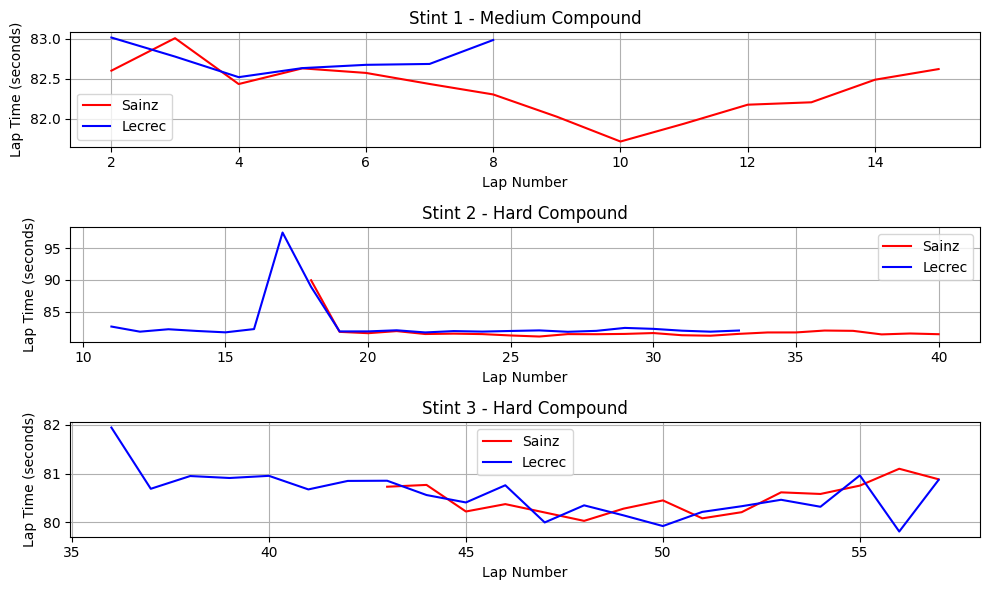

In [120]:
sainz_df = pd.DataFrame(sainz_laps_filtered)
lecrec_df = pd.DataFrame(lecrec_laps_filtered)

sainz_stint1 = sainz_df[sainz_df['Stint'] == 1]
sainz_stint2 = sainz_df[sainz_df['Stint'] == 2]
sainz_stint3 = sainz_df[sainz_df['Stint'] == 3]

lecrec_stint1 = lecrec_df[lecrec_df['Stint'] == 1]
lecrec_stint2 = lecrec_df[lecrec_df['Stint'] == 2]
lecrec_stint3 = lecrec_df[lecrec_df['Stint'] == 3]

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(sainz_stint1['LapNumber'], sainz_stint1['LapTime'], label='Sainz', color='red')
plt.plot(lecrec_stint1['LapNumber'], lecrec_stint1['LapTime'], label='Lecrec', color='blue')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.title('Stint 1 - Medium Compound')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(sainz_stint2['LapNumber'], sainz_stint2['LapTime'], label='Sainz', color='red')
plt.plot(lecrec_stint2['LapNumber'], lecrec_stint2['LapTime'], label='Lecrec', color='blue')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.title('Stint 2 - Hard Compound')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(sainz_stint3['LapNumber'], sainz_stint3['LapTime'], label='Sainz', color='red')
plt.plot(lecrec_stint3['LapNumber'], lecrec_stint3['LapTime'], label='Lecrec', color='blue')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.title('Stint 3 - Hard Compound')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

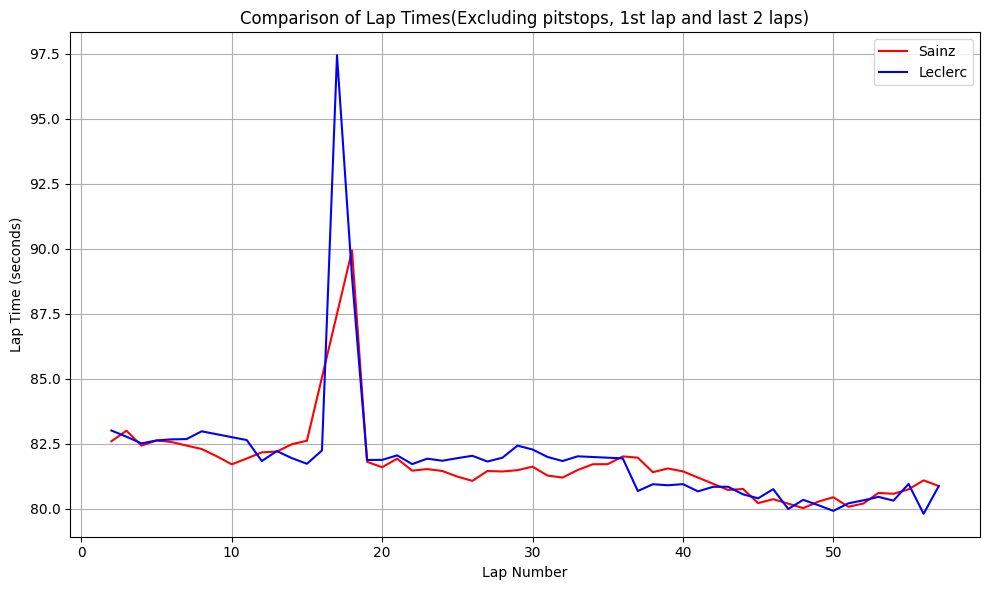

In [122]:
plt.figure(figsize=(10, 6))

plt.plot(sainz_df['LapNumber'], sainz_df['LapTime'], label='Sainz', color='red')
plt.plot(lecrec_df['LapNumber'], lecrec_df['LapTime'], label='Leclerc', color='blue')

plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.title('Comparison of Lap Times(Excluding pitstops, 1st lap and last 2 laps)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()